<a href="https://colab.research.google.com/github/tpeterz/happy-flix/blob/main/Resources/Graphing_POS_Tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning
## Run in a Google Colab notebook
### The process:
#### Step 1:
- Read in the combined_movies.csv file
    - This file contains all movie reviews from 1971 - 2024

# Step 1:

In [ ]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
# !pip install spacy
import spacy

movie_df = pd.read_csv('combined_movies.csv')
movie_df.head()

,Unnamed: 0,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,reviews
0,0,False,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,"[878, 12]",693134,en,Dune: Part Two,Follow the mythic journey of Paul Atreides as ...,4534.956,/1pdfLvkbY9ohJlCjQH2CZjjYVvJ.jpg,2024-02-27,Dune: Part Two,False,8.311,2707,FULL SPOILER-FREE REVIEW @ https://talkingfilm...
1,1,False,/1XDDXPXGiI8id7MrUxK36ke7gkX.jpg,"[16, 28, 12, 35, 10751]",1011985,en,Kung Fu Panda 4,Po is gearing up to become the spiritual leade...,3214.314,/f7QBvIzoWSJw3jWPGnZBc5vwQ0l.jpg,2024-03-02,Kung Fu Panda 4,False,7.066,897,_Kung Fu Panda 4_ isn’t the best _Kung Fu Pand...
2,2,False,/j3Z3XktmWB1VhsS8iXNcrR86PXi.jpg,"[28, 878, 12, 14]",823464,en,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2297.340,/tMefBSflR6PGQLv7WvFPpKLZkyk.jpg,2024-03-27,Godzilla x Kong: The New Empire,False,6.700,575,FULL SPOILER-FREE REVIEW @ https://fandomwire....
3,3,False,/oe7mWkvYhK4PLRNAVSvonzyUXNy.jpg,"[28, 53]",359410,en,Road House,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,/bXi6IQiQDHD00JFio5ZSZOeRSBh.jpg,2024-03-08,Road House,False,7.066,1379,Very poor scenario and the story just does not...
4,4,False,/pwGmXVKUgKN13psUjlhC9zBcq1o.jpg,"[28, 14]",634492,en,Madame Web,"Forced to confront revelations about her past,...",921.140,/rULWuutDcN5NvtiZi4FRPzRYWSh.jpg,2024-02-14,Madame Web,False,5.676,1046,We start off with an heavily pregnant woman de...


In [ ]:
# List the columns and content they contain
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6123 entries, 0 to 6122
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6123 non-null   int64  
 1   adult              6123 non-null   bool   
 2   backdrop_path      6064 non-null   object 
 3   genre_ids          6123 non-null   object 
 4   id                 6123 non-null   int64  
 5   original_language  6123 non-null   object 
 6   original_title     6123 non-null   object 
 7   overview           6123 non-null   object 
 8   popularity         6123 non-null   float64
 9   poster_path        6119 non-null   object 
 10  release_date       6123 non-null   object 
 11  title              6123 non-null   object 
 12  video              6123 non-null   bool   
 13  vote_average       6123 non-null   float64
 14  vote_count         6123 non-null   int64  
 15  reviews            6123 non-null   object 
dtypes: bool(2), float64(2), 

## Drop unnecessary columns
#### Given the list above, columns that are not pertinent to the project are:
- Unnamed: 0
- adult
- backdrop_path
- original_language
- original_title
- poster_path
- video
- vote_average
- vote_count
   

In [ ]:
# If this cell is not running properly, please restart your kernel
movie_df = movie_df.drop(['Unnamed: 0', 'adult','backdrop_path','original_language','original_title',
                          'original_title','poster_path','video','vote_average','vote_count'],axis=1)
# Rename 'id' to 'movie_id'
movie_df = movie_df.rename(columns={'id': 'movie_id'})
movie_df.head()

,genre_ids,movie_id,overview,popularity,release_date,title,reviews
0,"[878, 12]",693134,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,FULL SPOILER-FREE REVIEW @ https://talkingfilm...
1,"[16, 28, 12, 35, 10751]",1011985,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,_Kung Fu Panda 4_ isn’t the best _Kung Fu Pand...
2,"[28, 878, 12, 14]",823464,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,FULL SPOILER-FREE REVIEW @ https://fandomwire....
3,"[28, 53]",359410,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,Very poor scenario and the story just does not...
4,"[28, 14]",634492,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,We start off with an heavily pregnant woman de...


In [ ]:
# Shape of the dataframe
# (rows, columns)
print(movie_df.shape)

(6123, 7)


## Look at the how NLTK handles a randomly selected movie review in it's current form, before cleaning.



In [ ]:
# In the original format of text from the review column
# Grabbing index 40 as a sample to see how NLTK treats this text in it's original form
example = movie_df['reviews'][40]
print(example)

FULL SPOILER-FREE REVIEW @ https://fandomwire.com/ordinary-angels-review-an-optimistic-true-story/

"Ordinary Angels resonates as a powerful reminder of the human capacity for compassion and collective effort in the face of adversity. The sensitive screenplay by Kelly Fremon Craig and Meg Tilly, along with the stirring performances by Hilary Swank and Alan Ritchson, elevate this true story above the ordinary, offering an inspirational viewing experience that is both a celebration of the human spirit and a call to our inherent goodness.

Despite relying on genre conventions, it stands out for its authenticity and the hopeful message it conveys. It’s, without a doubt, a movie that not only warms the heart of everyone who sees it but also prompts reflection on the transformative impact of generosity, altruism, and mutual care in building a better world."

Rating: B


In [ ]:
nltk.download('punkt')
nltk.word_tokenize(example)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['FULL',
 'SPOILER-FREE',
 'REVIEW',
 '@',
 'https',
 ':',
 '//fandomwire.com/ordinary-angels-review-an-optimistic-true-story/',
 "''",
 'Ordinary',
 'Angels',
 'resonates',
 'as',
 'a',
 'powerful',
 'reminder',
 'of',
 'the',
 'human',
 'capacity',
 'for',
 'compassion',
 'and',
 'collective',
 'effort',
 'in',
 'the',
 'face',
 'of',
 'adversity',
 '.',
 'The',
 'sensitive',
 'screenplay',
 'by',
 'Kelly',
 'Fremon',
 'Craig',
 'and',
 'Meg',
 'Tilly',
 ',',
 'along',
 'with',
 'the',
 'stirring',
 'performances',
 'by',
 'Hilary',
 'Swank',
 'and',
 'Alan',
 'Ritchson',
 ',',
 'elevate',
 'this',
 'true',
 'story',
 'above',
 'the',
 'ordinary',
 ',',
 'offering',
 'an',
 'inspirational',
 'viewing',
 'experience',
 'that',
 'is',
 'both',
 'a',
 'celebration',
 'of',
 'the',
 'human',
 'spirit',
 'and',
 'a',
 'call',
 'to',
 'our',
 'inherent',
 'goodness',
 '.',
 'Despite',
 'relying',
 'on',
 'genre',
 'conventions',
 ',',
 'it',
 'stands',
 'out',
 'for',
 'its',
 'authenticit

#### This text needs to be tokenized, the steps are as follows:

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['FULL',
 'SPOILER-FREE',
 'REVIEW',
 '@',
 'https',
 ':',
 '//fandomwire.com/ordinary-angels-review-an-optimistic-true-story/',
 "''",
 'Ordinary',
 'Angels']

### NLTK's "parts of speech"
#### This generates each token (of the 10 generated above) and the part of speech that NLTK believes it belongs to.
#### The purpose of showing this portion now is to understand what a random sample of the data in the 'review' column looks like before cleanup.
#### Reference link for the meaning of each abbreviation of `pos_tag`:
- https://www.guru99.com/pos-tagging-chunking-nltk.html

In [ ]:
# NLTK's "parts of speech"
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('FULL', 'NNP'),
 ('SPOILER-FREE', 'NNP'),
 ('REVIEW', 'NNP'),
 ('@', 'NNP'),
 ('https', 'NN'),
 (':', ':'),
 ('//fandomwire.com/ordinary-angels-review-an-optimistic-true-story/', 'JJ'),
 ("''", "''"),
 ('Ordinary', 'JJ'),
 ('Angels', 'NNP')]

In [ ]:
# PLace these into entities
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  (ORGANIZATION FULL/NNP)
  SPOILER-FREE/NNP
  REVIEW/NNP
  @/NNP
  https/NN
  :/:
  //fandomwire.com/ordinary-angels-review-an-optimistic-true-story//JJ
  ''/''
  Ordinary/JJ
  (ORGANIZATION Angels/NNP)
  resonates/VBZ
  as/IN
  a/DT
  powerful/JJ
  reminder/NN
  of/IN
  the/DT
  human/JJ
  capacity/NN
  for/IN
  compassion/NN
  and/CC
  collective/JJ
  effort/NN
  in/IN
  the/DT
  face/NN
  of/IN
  adversity/NN
  ./.
  The/DT
  sensitive/JJ
  screenplay/NN
  by/IN
  (PERSON Kelly/NNP Fremon/NNP Craig/NNP)
  and/CC
  (PERSON Meg/NNP Tilly/NNP)
  ,/,
  along/IN
  with/IN
  the/DT
  stirring/VBG
  performances/NNS
  by/IN
  (PERSON Hilary/NNP Swank/NNP)
  and/CC
  (PERSON Alan/NNP Ritchson/NNP)
  ,/,
  elevate/VB
  this/DT
  true/JJ
  story/NN
  above/IN
  the/DT
  ordinary/JJ
  ,/,
  offering/VBG
  an/DT
  inspirational/JJ
  viewing/NN
  experience/NN
  that/WDT
  is/VBZ
  both/DT
  a/DT
  celebration/NN
  of/IN
  the/DT
  human/JJ
  spirit/NN
  and/CC
  a/DT
  call/NN
  to/TO
  our

# 2. Text pre-processing
#### Apply all of the following to the text in the 'reviews' column. Steps taken to reduce noise and clean text of `movie_df['reviews']`:
1. Handle contractions, punctuations, and any other special characters.
2. Tokenization
3. Removing stopwords
4. Tagging parts of speech (pos_tagging)
5. Lemmatization

Pre-processing checklist:
* [Aspect-based Sentiment Analysis of Movie Reviews](https://scholar.smu.edu/cgi/viewcontent.cgi?article=1205&context=datasciencereview)

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    text = re.sub(r'full spoiler-free review @', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove emoticons
    text = re.sub(r'[^\w\s]', '', text)
    # Remove HTML tags
    text = re.sub('<br\s?\/>|<br>', "", text)
    # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    # Remove numbers
    text = re.sub('\w*\d\w*', ' ', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    # Lemmatize words
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    # Join words back into a single string
    cleaned_text = ' '.join(lemmatized_text)
    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('punkt')

movie_df['clean_reviews'] = movie_df['reviews'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
movie_df.head()

,genre_ids,movie_id,overview,popularity,release_date,title,reviews,clean_reviews
0,"[878, 12]",693134,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,FULL SPOILER-FREE REVIEW @ https://talkingfilm...,dune part two surpasses even highest expectati...
1,"[16, 28, 12, 35, 10751]",1011985,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,_Kung Fu Panda 4_ isn’t the best _Kung Fu Pand...,kung fu panda isnt best kung fu panda film eve...
2,"[28, 878, 12, 14]",823464,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,FULL SPOILER-FREE REVIEW @ https://fandomwire....,godzilla x kong new empire version previous in...
3,"[28, 53]",359410,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,Very poor scenario and the story just does not...,poor scenario story add ending also convincing...
4,"[28, 14]",634492,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,We start off with an heavily pregnant woman de...,start heavily pregnant woman deep peruvian jun...


# Mapping Genres again

In [ ]:
import ast

# Genre ID to name mapping
genre_mapping = {
    28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime',
    99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History',
    27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction',
    10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'
}

# Create a column for each genre with a prefix
for genre_id, genre_name in genre_mapping.items():
    column_name = f"type_{genre_name}"
    movie_df[column_name] = movie_df['genre_ids'].apply(lambda ids: 1 if genre_id in ast.literal_eval(ids) else 0)

movie_df.head()

,genre_ids,movie_id,overview,popularity,release_date,title,reviews,clean_reviews,type_Action,type_Adventure,...,type_History,type_Horror,type_Music,type_Mystery,type_Romance,type_Science Fiction,type_TV Movie,type_Thriller,type_War,type_Western
0,"[878, 12]",693134,Follow the mythic journey of Paul Atreides as ...,4534.956,2024-02-27,Dune: Part Two,FULL SPOILER-FREE REVIEW @ https://talkingfilm...,dune part two surpasses even highest expectati...,0,1,...,0,0,0,0,0,1,0,0,0,0
1,"[16, 28, 12, 35, 10751]",1011985,Po is gearing up to become the spiritual leade...,3214.314,2024-03-02,Kung Fu Panda 4,_Kung Fu Panda 4_ isn’t the best _Kung Fu Pand...,kung fu panda isnt best kung fu panda film eve...,1,1,...,0,0,0,0,0,0,0,0,0,0
2,"[28, 878, 12, 14]",823464,"Following their explosive showdown, Godzilla a...",2297.340,2024-03-27,Godzilla x Kong: The New Empire,FULL SPOILER-FREE REVIEW @ https://fandomwire....,godzilla x kong new empire version previous in...,1,1,...,0,0,0,0,0,1,0,0,0,0
3,"[28, 53]",359410,Ex-UFC fighter Dalton takes a job as a bouncer...,1134.726,2024-03-08,Road House,Very poor scenario and the story just does not...,poor scenario story add ending also convincing...,1,0,...,0,0,0,0,0,0,0,1,0,0
4,"[28, 14]",634492,"Forced to confront revelations about her past,...",921.140,2024-02-14,Madame Web,We start off with an heavily pregnant woman de...,start heavily pregnant woman deep peruvian jun...,1,0,...,0,0,0,0,0,0,0,0,0,0


# Tokenization: Part 1:
- The goal is to plot the most common adjectives per genre.
- In order to focus on movie-specific information, a clear and concise description of each movie is important
- For this, the `overviews` column needs to be cleaned and tokenized

## Clean and tokenize the `overviews` column.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, regexp_tokenize
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

def clean_overview(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove HTML tags
    text = re.sub('<br\s?\/>|<br>', "", text)
    # Remove punctuation more effectively
    text = re.sub(r'[^\w\s]', ' ', text)
    # Remove numbers and special characters more effectively
    text = re.sub(r'\d+', ' ', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    # Lemmatize words
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    # Join words back into a single string
    cleaned_text = ' '.join(lemmatized_text)
    return cleaned_text

# Apply the cleaning function to the 'overview' column
movie_df['clean_overviews'] = movie_df['overview'].apply(clean_overview)
# Peak at the first couple rows after this process
movie_df['clean_overviews'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    follow mythic journey paul atreides unites cha...
1    po gearing become spiritual leader valley peac...
2    following explosive showdown godzilla kong mus...
3    ex ufc fighter dalton take job bouncer florida...
4    forced confront revelation past paramedic cass...
Name: clean_overviews, dtype: object

In [ ]:
# Take a look to see how the cleaning function performed
with pd.option_context('display.max_colwidth', None):
    print(movie_df['clean_overviews'].head(20))

0                                                                                                                                   follow mythic journey paul atreides unites chani fremen path revenge conspirator destroyed family facing choice love life fate known universe paul endeavor prevent terrible future foresee
1                                                                                                                                      po gearing become spiritual leader valley peace also need someone take place dragon warrior train new kung fu practitioner spot encounter villain called chameleon conjures villain past
2                                                                                                                                                                                                following explosive showdown godzilla kong must reunite colossal undiscovered threat hidden within world challenging existence
3                                       

#### Remove the original `overview` and `reviews` column

In [ ]:
# If this cell is having trouble running, you may need to restart the kernel. It can only be ran once per session.
movie_df = movie_df.drop(['overview', 'reviews'],axis=1)


In [ ]:
movie_df.head()

,genre_ids,movie_id,popularity,release_date,title,clean_reviews,type_Action,type_Adventure,type_Animation,type_Comedy,...,type_Horror,type_Music,type_Mystery,type_Romance,type_Science Fiction,type_TV Movie,type_Thriller,type_War,type_Western,clean_overviews
0,"[878, 12]",693134,4534.956,2024-02-27,Dune: Part Two,dune part two surpasses even highest expectati...,0,1,0,0,...,0,0,0,0,1,0,0,0,0,follow mythic journey paul atreides unites cha...
1,"[16, 28, 12, 35, 10751]",1011985,3214.314,2024-03-02,Kung Fu Panda 4,kung fu panda isnt best kung fu panda film eve...,1,1,1,1,...,0,0,0,0,0,0,0,0,0,po gearing become spiritual leader valley peac...
2,"[28, 878, 12, 14]",823464,2297.340,2024-03-27,Godzilla x Kong: The New Empire,godzilla x kong new empire version previous in...,1,1,0,0,...,0,0,0,0,1,0,0,0,0,following explosive showdown godzilla kong mus...
3,"[28, 53]",359410,1134.726,2024-03-08,Road House,poor scenario story add ending also convincing...,1,0,0,0,...,0,0,0,0,0,0,1,0,0,ex ufc fighter dalton take job bouncer florida...
4,"[28, 14]",634492,921.140,2024-02-14,Madame Web,start heavily pregnant woman deep peruvian jun...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,forced confront revelation past paramedic cass...


# Formatting 'release_date' column to '%Y-%m-%d'
- Originally, half of the dataframe was in '%Y-%m-%d' format, while the other half was '%m/%d/%Y'.
### (Additionally) creating 'release_year' column to store only the year of each movie's release.

In [ ]:
from datetime import datetime

DATE_FORMATS = ['%Y-%m-%d', '%m/%d/%Y']

def parse_date(date_str):
    for date_format in DATE_FORMATS:
        try:
            return datetime.strptime(date_str, date_format)
        except ValueError:
            pass
    # If none of the formats match, return None or handle the error as needed
    return None

# Apply the parse_date function to the 'release_date' column
movie_df['release_date'] = movie_df['release_date'].apply(parse_date)

# # Convert the 'release_date' column to datetime format
# movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

# Extract the year from the 'release_date' column and create a new 'release_year' column
movie_df['release_year'] = movie_df['release_date'].dt.year
movie_df.head()

,genre_ids,movie_id,popularity,release_date,title,clean_reviews,type_Action,type_Adventure,type_Animation,type_Comedy,...,type_Music,type_Mystery,type_Romance,type_Science Fiction,type_TV Movie,type_Thriller,type_War,type_Western,clean_overviews,release_year
0,"[878, 12]",693134,4534.956,2024-02-27,Dune: Part Two,dune part two surpasses even highest expectati...,0,1,0,0,...,0,0,0,1,0,0,0,0,follow mythic journey paul atreides unites cha...,2024
1,"[16, 28, 12, 35, 10751]",1011985,3214.314,2024-03-02,Kung Fu Panda 4,kung fu panda isnt best kung fu panda film eve...,1,1,1,1,...,0,0,0,0,0,0,0,0,po gearing become spiritual leader valley peac...,2024
2,"[28, 878, 12, 14]",823464,2297.340,2024-03-27,Godzilla x Kong: The New Empire,godzilla x kong new empire version previous in...,1,1,0,0,...,0,0,0,1,0,0,0,0,following explosive showdown godzilla kong mus...,2024
3,"[28, 53]",359410,1134.726,2024-03-08,Road House,poor scenario story add ending also convincing...,1,0,0,0,...,0,0,0,0,0,1,0,0,ex ufc fighter dalton take job bouncer florida...,2024
4,"[28, 14]",634492,921.140,2024-02-14,Madame Web,start heavily pregnant woman deep peruvian jun...,1,0,0,0,...,0,0,0,0,0,0,0,0,forced confront revelation past paramedic cass...,2024


# Plotting the most common adjectives per genre

# Adjectives Part 1:
# Genre: Action

In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt

# Ensure you have downloaded the necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Mapping from NLTK POS tags to WordNet POS tags
tag_map = {
    "N": wordnet.NOUN,
    "V": wordnet.VERB,
    "J": wordnet.ADJ,
    "R": wordnet.ADV
}

# Function to tokenize and tag parts of speech, then lemmatize
def tokenize_tag_lemmatize(text):
    tokens = word_tokenize(text)
    tagged = nltk.pos_tag(tokens)
    # Map NLTK tags to WordNet tags and lemmatize
    lemmatized = [(token, tag_map.get(tag[0], wordnet.NOUN)) for token, tag in tagged]
    lemmatizer = WordNetLemmatizer()
    lemmatized = [(lemmatizer.lemmatize(token, pos), pos) for token, pos in lemmatized]
    return lemmatized

# Function to count adjectives
def count_adjectives(lemmatized_text):
    adjectives = [word for word, pos in lemmatized_text if pos == wordnet.ADJ]
    return Counter(adjectives)

# Apply tokenization, tagging, and lemmatization to each overview
movie_df['lemmatized_overviews'] = movie_df['clean_overviews'].apply(tokenize_tag_lemmatize)

# Count adjectives in each overview
movie_df['adjective_counts'] = movie_df['lemmatized_overviews'].apply(count_adjectives)

# Count adjective for the Action genre
action_movies = movie_df[movie_df['type_Action'] == 1]
action_adjectives = Counter()

for counts in action_movies['adjective_counts']:
    action_adjectives += counts

# Display the most common adjectives for the action genre
print(action_adjectives.most_common(10))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[('new', 236), ('young', 157), ('secret', 108), ('old', 101), ('former', 100), ('mysterious', 100), ('dangerous', 89), ('human', 87), ('high', 84), ('american', 82)]


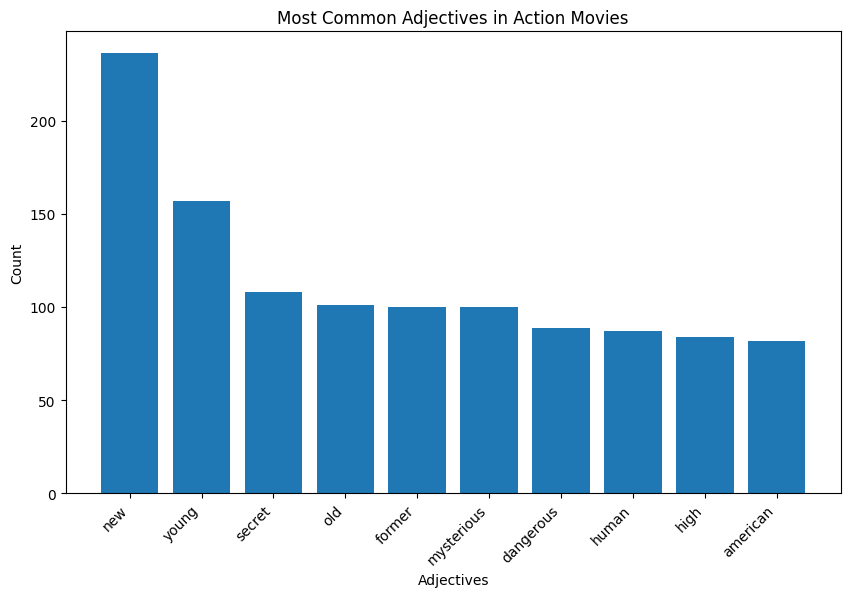

In [ ]:
import matplotlib.pyplot as plt

adjectives = [item[0] for item in action_adjectives.most_common(10)]
counts = [item[1] for item in action_adjectives.most_common(10)]

# Set the fig size (adjusted to fit)
plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(adjectives, counts)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Adjectives')
plt.ylabel('Count')
plt.title('Most Common Adjectives in Action Movies')

# Use a style that makes the plot look nicer
plt.style.use('ggplot')

# Show the plot
plt.show()


#### Adjusting code to provide a more visually please graph

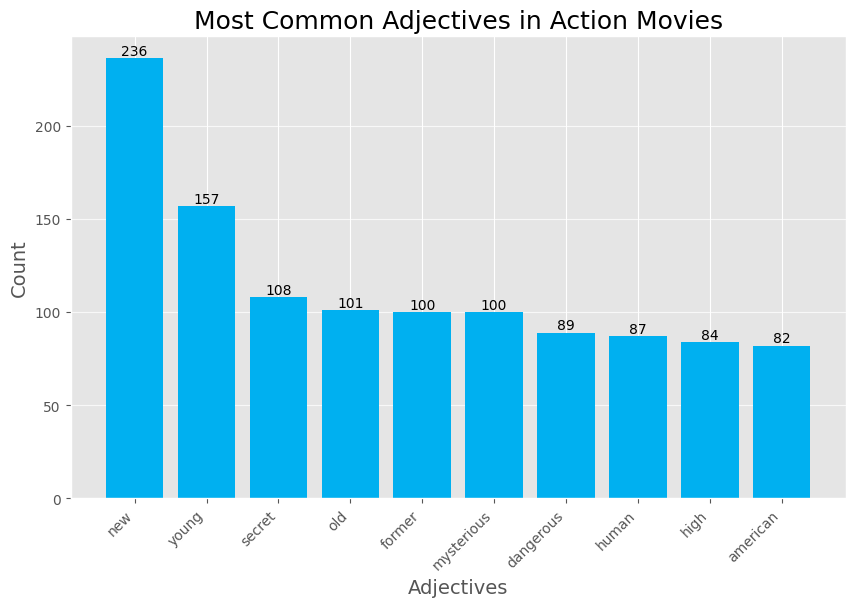

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

adjectives = [item[0] for item in action_adjectives.most_common(10)]
counts = [item[1] for item in action_adjectives.most_common(10)]

# Set the figure size to make the plot larger
plt.figure(figsize=(10, 6))

# Create the bar chart with a specific color
plt.bar(adjectives, counts, color='#00b0f0')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Adjectives', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Most Common Adjectives in Action Movies', fontsize=18)

# Add a grid for easier reading of values
plt.grid(axis='y', alpha=0.75)

# Use a style that makes the plot look nicer
plt.style.use('ggplot')

# Add annotations to highlight specific values
for i, v in enumerate(counts):
    plt.text(x=i, y=v, s=f'{v}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()


In [ ]:
# Count adjective for the Mystery genre
mystery_movies = movie_df[movie_df['type_Mystery'] == 1]
mystery_adjectives = Counter()

for counts in mystery_movies['adjective_counts']:
    mystery_adjectives += counts

# Display the most common adjectives for the action genre
print(mystery_adjectives.most_common(10))

[('young', 99), ('mysterious', 75), ('new', 66), ('secret', 50), ('detective', 40), ('old', 39), ('high', 29), ('small', 27), ('former', 25), ('american', 25)]


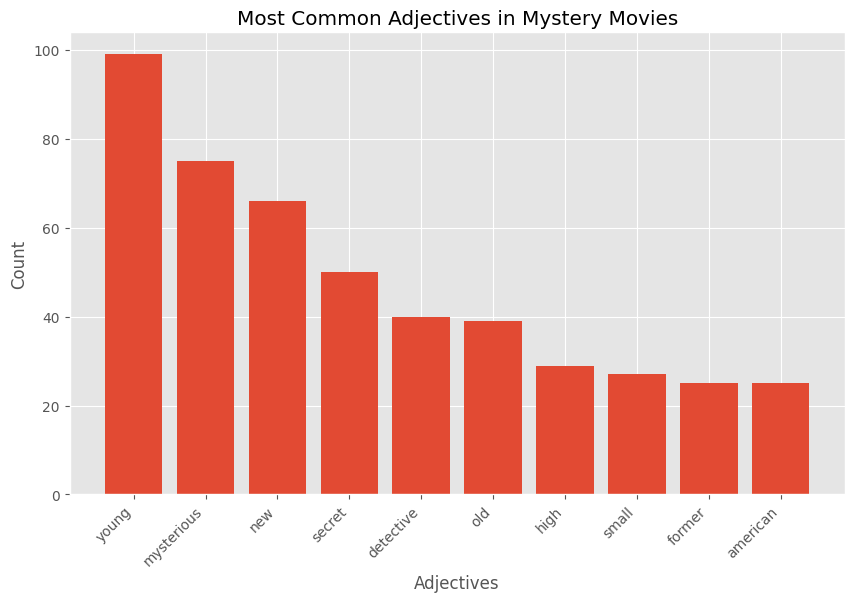

In [ ]:
import matplotlib.pyplot as plt

adjectives = [item[0] for item in mystery_adjectives.most_common(10)]
counts = [item[1] for item in mystery_adjectives.most_common(10)]

# Set the fig size (adjusted to fit)
plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(adjectives, counts)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Adjectives')
plt.ylabel('Count')
plt.title('Most Common Adjectives in Mystery Movies')

# Use a style that makes the plot look nicer
plt.style.use('ggplot')

# Show the plot
plt.show()


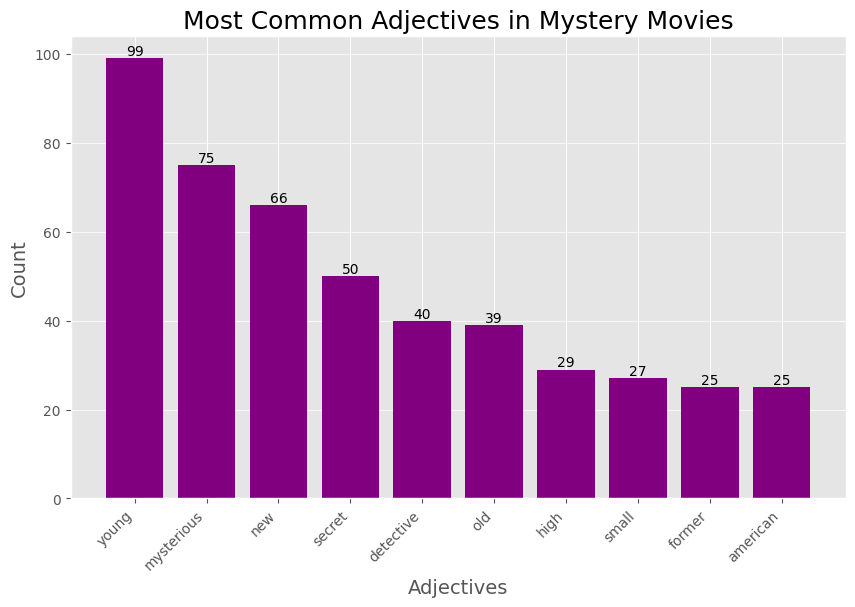

In [ ]:
# Set the figure size to make the plot larger
plt.figure(figsize=(10, 6))

# Create the bar chart with a specific color
plt.bar(adjectives, counts, color='purple')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Adjectives', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Most Common Adjectives in Mystery Movies', fontsize=18)

# Add a grid for easier reading of values
plt.grid(axis='y', alpha=0.75)

# Use a style that makes the plot look nicer
plt.style.use('ggplot')

# Add annotations to highlight specific values
for i, v in enumerate(counts):
    plt.text(x=i, y=v, s=f'{v}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

In [ ]:
# Count adjective for the Drama genre
drama_movies = movie_df[movie_df['type_Drama'] == 1]
drama_adjectives = Counter()

for counts in drama_movies['adjective_counts']:
    drama_adjectives += counts

# Display the most common adjectives for the action genre
print(drama_adjectives.most_common(10))

[('young', 337), ('new', 290), ('old', 201), ('american', 141), ('true', 122), ('high', 120), ('small', 95), ('u', 80), ('mysterious', 80), ('former', 77)]


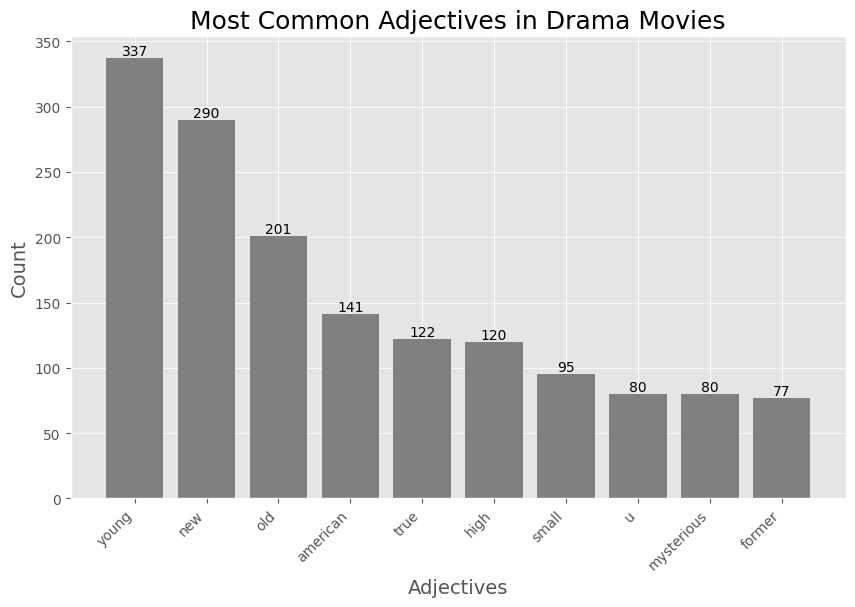

In [ ]:
import matplotlib.pyplot as plt

adjectives = [item[0] for item in drama_adjectives.most_common(10)]
counts = [item[1] for item in drama_adjectives.most_common(10)]

# Set the figure size to make the plot larger
plt.figure(figsize=(10, 6))

# Create the bar chart with a specific color
plt.bar(adjectives, counts, color='gray')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Adjectives', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Most Common Adjectives in Drama Movies', fontsize=18)

# Add a grid for easier reading of values
plt.grid(axis='y', alpha=0.75)

# Use a style that makes the plot look nicer
plt.style.use('ggplot')

# Add annotations to highlight specific values
for i, v in enumerate(counts):
    plt.text(x=i, y=v, s=f'{v}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

In [ ]:
# Count adjective for the comedy genre
comedy_movies = movie_df[movie_df['type_Comedy'] == 1]
comedy_adjectives = Counter()

for counts in comedy_movies['adjective_counts']:
    comedy_adjectives += counts

# Display the most common adjectives for the action genre
print(comedy_adjectives.most_common(10))

[('new', 346), ('old', 177), ('young', 168), ('high', 143), ('best', 86), ('big', 86), ('secret', 69), ('little', 64), ('mysterious', 63), ('small', 63)]


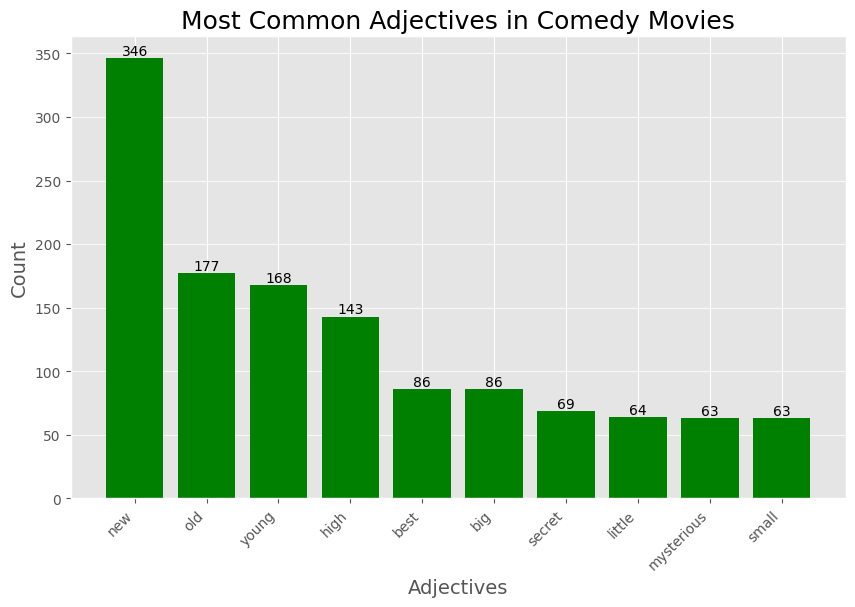

In [ ]:
import matplotlib.pyplot as plt

adjectives = [item[0] for item in comedy_adjectives.most_common(10)]
counts = [item[1] for item in comedy_adjectives.most_common(10)]

# Set the figure size to make the plot larger
plt.figure(figsize=(10, 6))

# Create the bar chart with a specific color
plt.bar(adjectives, counts, color='green')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Adjectives', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Most Common Adjectives in Comedy Movies', fontsize=18)

# Add a grid for easier reading of values
plt.grid(axis='y', alpha=0.75)

# Use a style that makes the plot look nicer
plt.style.use('ggplot')

# Add annotations to highlight specific values
for i, v in enumerate(counts):
    plt.text(x=i, y=v, s=f'{v}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

In [ ]:
# # Uncomment this code if the below cells do not run
# import nltk
# from nltk.corpus import wordnet
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# from collections import Counter
# import matplotlib.pyplot as plt

# # Ensure you have downloaded the necessary NLTK data
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

# # Mapping from NLTK POS tags to WordNet POS tags
# tag_map = {
#     "N": wordnet.NOUN,
#     "V": wordnet.VERB,
#     "J": wordnet.ADJ,
#     "R": wordnet.ADV
# }

# # Function to tokenize and tag parts of speech, then lemmatize
# def tokenize_tag_lemmatize(text):
#     tokens = word_tokenize(text)
#     tagged = nltk.pos_tag(tokens)
#     # Map NLTK tags to WordNet tags and lemmatize
#     lemmatized = [(token, tag_map.get(tag[0], wordnet.NOUN)) for token, tag in tagged]
#     lemmatizer = WordNetLemmatizer()
#     lemmatized = [(lemmatizer.lemmatize(token, pos), pos) for token, pos in lemmatized]
#     return lemmatized

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Now that the parts of speech have been tagged, tagging the reviews column will help with further sentiment analysis.
- Let's revisit the cleaning function and add tokenization, similar to what was done to the overviews column
#### Reference link: [NLTK for Sentiment Analysis]( https://realpython.com/python-nltk-sentiment-analysis/)

In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter

# Ensure you have downloaded the necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Mapping from NLTK POS tags to WordNet POS tags
tag_map = {
    "N": wordnet.NOUN,
    "V": wordnet.VERB,
    "J": wordnet.ADJ,
    "R": wordnet.ADV
}

# Function to tokenize and tag parts of speech, then lemmatize
def tokenize_tag_lemmatize(text):
    tokens = word_tokenize(text)
    tagged = nltk.pos_tag(tokens)
    # Map NLTK tags to WordNet tags and lemmatize
    lemmatized = [(token, tag_map.get(tag[0], wordnet.NOUN)) for token, tag in tagged]
    lemmatizer = WordNetLemmatizer()
    lemmatized = [(lemmatizer.lemmatize(token, pos), pos) for token, pos in lemmatized]
    return lemmatized

# Apply tokenization, tagging, and lemmatization to each review
movie_df['lemmatized_reviews'] = movie_df['clean_reviews'].apply(tokenize_tag_lemmatize)
movie_df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,genre_ids,movie_id,popularity,release_date,title,clean_reviews,type_Action,type_Adventure,type_Animation,type_Comedy,...,type_Science Fiction,type_TV Movie,type_Thriller,type_War,type_Western,clean_overviews,release_year,lemmatized_overviews,adjective_counts,lemmatized_reviews
0,"[878, 12]",693134,4534.956,2024-02-27,Dune: Part Two,dune part two surpasses even highest expectati...,0,1,0,0,...,1,0,0,0,0,follow mythic journey paul atreides unites cha...,2024,"[(follow, a), (mythic, a), (journey, n), (paul...","{'follow': 1, 'mythic': 1, 'chani': 1, 'univer...","[(dune, a), (part, n), (two, n), (surpasses, n..."
1,"[16, 28, 12, 35, 10751]",1011985,3214.314,2024-03-02,Kung Fu Panda 4,kung fu panda isnt best kung fu panda film eve...,1,1,1,1,...,0,0,0,0,0,po gearing become spiritual leader valley peac...,2024,"[(po, n), (gear, v), (become, a), (spiritual, ...","{'become': 1, 'spiritual': 1, 'new': 1}","[(kung, n), (fu, n), (panda, n), (isnt, n), (b..."
2,"[28, 878, 12, 14]",823464,2297.340,2024-03-27,Godzilla x Kong: The New Empire,godzilla x kong new empire version previous in...,1,1,0,0,...,1,0,0,0,0,following explosive showdown godzilla kong mus...,2024,"[(follow, v), (explosive, a), (showdown, a), (...","{'explosive': 1, 'showdown': 1, 'undiscovered'...","[(godzilla, n), (x, n), (kong, v), (new, a), (..."
3,"[28, 53]",359410,1134.726,2024-03-08,Road House,poor scenario story add ending also convincing...,1,0,0,0,...,0,0,1,0,0,ex ufc fighter dalton take job bouncer florida...,2024,"[(ex, n), (ufc, a), (fighter, n), (dalton, n),...",{'ufc': 1},"[(poor, a), (scenario, n), (story, n), (add, n..."
4,"[28, 14]",634492,921.140,2024-02-14,Madame Web,start heavily pregnant woman deep peruvian jun...,1,0,0,0,...,0,0,0,0,0,forced confront revelation past paramedic cass...,2024,"[(force, v), (confront, a), (revelation, n), (...","{'confront': 1, 'paramedic': 1, 'young': 1, 'p...","[(start, v), (heavily, r), (pregnant, a), (wom..."


In [ ]:
# Function to count nouns
def count_nouns(lemmatized_text):
    nouns = [word for word, pos in lemmatized_text if pos == wordnet.NOUN]
    return Counter(nouns)

# Apply tokenization, tagging, and lemmatization to each review
movie_df['lemmatized_reviews'] = movie_df['clean_reviews'].apply(tokenize_tag_lemmatize)

# Count nouns in each review
movie_df['nouns_counts'] = movie_df['lemmatized_reviews'].apply(count_nouns)

# Creating a WordCload that will be continuously modified (with stop words added) to refine

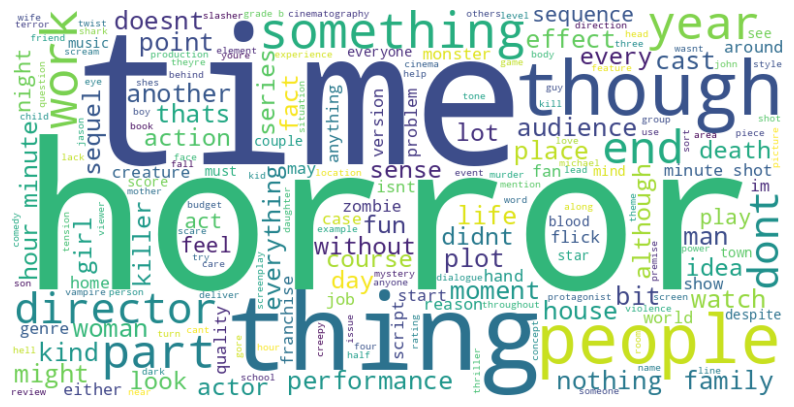

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a new DataFrame for the horror genre
horror_movies = movie_df[movie_df['type_Horror'] == 1]

# Extract the nouns from the lemmatized reviews
horror_nouns = []
for review in horror_movies['lemmatized_reviews']:
    for word, pos in review:
        if pos == wordnet.NOUN:
            horror_nouns.append(word)

# Remove the specified words
stopwords = ['film', 'movie', 'one', 'two', 'would', 'character', 'story', 'scene', 'way', 'could', 'wihtout', 'role']
horror_nouns = [word for word in horror_nouns if word not in stopwords]

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(horror_nouns))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Adjectives counting function

In [ ]:
# Function to count adjectives
def count_adjectives(lemmatized_text):
    adjectives = [word for word, pos in lemmatized_text if pos == wordnet.ADJ]
    return Counter(adjectives)

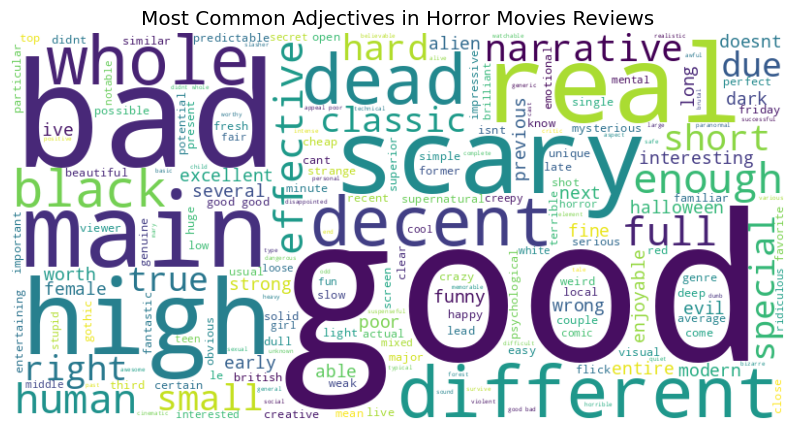

In [ ]:
# A more detailed stopwords list to improve the output of the wordcloud
import matplotlib.pyplot as plt
# Create a new DataFrame for the horror genre
horror_movies = movie_df[movie_df['type_Horror'] == 1]

# Extract the adjectives from the lemmatized reviews
horror_adjectives = []
for review in horror_movies['lemmatized_reviews']:
    for word, pos in review:
        if pos == wordnet.ADJ:
            horror_adjectives.append(word)

# Remove the specified words
stopwords = ['film', 'movie', 'one', 'two', 'would', 'character', 'story', 'scene',
             'way', 'could', 'without', 'role', 'dont', 'overall','many','little',
             'new', 'original','young','american','much','least','nice','little',
             'great','u','big','first','last','final','old','second','best','give',
             'sure','l','im']#'bad','good'
horror_adjectives = [word for word in horror_adjectives if word not in stopwords]

# Count the most common adjective
most_common_adjective = Counter(horror_adjectives).most_common(1)[0][0]

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(horror_adjectives))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Add a title
plt.title(f'Most Common Adjectives in Horror Movies Reviews')

# Show the plot
plt.show()


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis on lemmatized reviews
def analyze_sentiment(lemmatized_text):
    # Join the lemmatized text back into a single string
    text = ' '.join([word for word, pos in lemmatized_text])
    # Perform sentiment analysis
    sentiment = sia.polarity_scores(text)
    # Return a binary sentiment label (1 for positive, 0 for negative)
    return 1 if sentiment['compound'] > 0 else 0

# Perform sentiment analysis on each review
movie_df['sentiment'] = movie_df['lemmatized_reviews'].apply(analyze_sentiment)

# Split your data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(movie_df['clean_reviews'], movie_df['sentiment'], test_size=0.2, random_state=42)

# Convert the reviews into a matrix of TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes classifier on the training data
clf = MultinomialNB().fit(X_train_tfidf, y_train)

# Predict the sentiment of the test reviews
y_pred = clf.predict(X_test_tfidf)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print a confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print a classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8089795918367347
[[  0 234]
 [  0 991]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.81      1.00      0.89       991

    accuracy                           0.81      1225
   macro avg       0.40      0.50      0.45      1225
weighted avg       0.65      0.81      0.72      1225



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
movie_df.head()

,genre_ids,movie_id,popularity,release_date,title,clean_reviews,type_Action,type_Adventure,type_Animation,type_Comedy,...,type_TV Movie,type_Thriller,type_War,type_Western,clean_overviews,release_year,lemmatized_overviews,adjective_counts,lemmatized_reviews,sentiment
0,"[878, 12]",693134,4534.956,2024-02-27,Dune: Part Two,dune part two surpasses even highest expectati...,0,1,0,0,...,0,0,0,0,follow mythic journey paul atreides unites cha...,2024,"[(follow, a), (mythic, a), (journey, n), (paul...","{'follow': 1, 'mythic': 1, 'chani': 1, 'univer...","[(dune, a), (part, n), (two, n), (surpasses, n...",1
1,"[16, 28, 12, 35, 10751]",1011985,3214.314,2024-03-02,Kung Fu Panda 4,kung fu panda isnt best kung fu panda film eve...,1,1,1,1,...,0,0,0,0,po gearing become spiritual leader valley peac...,2024,"[(po, n), (gear, v), (become, a), (spiritual, ...","{'become': 1, 'spiritual': 1, 'new': 1}","[(kung, n), (fu, n), (panda, n), (isnt, n), (b...",0
2,"[28, 878, 12, 14]",823464,2297.340,2024-03-27,Godzilla x Kong: The New Empire,godzilla x kong new empire version previous in...,1,1,0,0,...,0,0,0,0,following explosive showdown godzilla kong mus...,2024,"[(follow, v), (explosive, a), (showdown, a), (...","{'explosive': 1, 'showdown': 1, 'undiscovered'...","[(godzilla, n), (x, n), (kong, v), (new, a), (...",1
3,"[28, 53]",359410,1134.726,2024-03-08,Road House,poor scenario story add ending also convincing...,1,0,0,0,...,0,1,0,0,ex ufc fighter dalton take job bouncer florida...,2024,"[(ex, n), (ufc, a), (fighter, n), (dalton, n),...",{'ufc': 1},"[(poor, a), (scenario, n), (story, n), (add, n...",1
4,"[28, 14]",634492,921.140,2024-02-14,Madame Web,start heavily pregnant woman deep peruvian jun...,1,0,0,0,...,0,0,0,0,forced confront revelation past paramedic cass...,2024,"[(force, v), (confront, a), (revelation, n), (...","{'confront': 1, 'paramedic': 1, 'young': 1, 'p...","[(start, v), (heavily, r), (pregnant, a), (wom...",1


# Save to CSV file
## This file will be used for sentiment analysis with VADERS and ROBEBRTA

In [ ]:
# saving the dataframe
movie_df.to_csv('clean_movies.csv')